In [1]:
# Copyright Tay Zhi Cong, year 2025

import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


There are 2 approches of obtaining filter taps coeffiecients for a particular design: 
1. calling the api using freqz 
2. using fft, which is a more fundamental approach

All filters here are designed using the window method. In window method, the sinc function is windowed to produce a filter. \
The alternative method will be using the Remez algorithm.

#### Method1:

beta is 5.65326
filter length is 372


/var/folders/t4/f61pdd9x60nbtc7tlcsj1fs80000gn/T/ipykernel_21899/1569826360.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
/var/folders/t4/f61pdd9x60nbtc7tlcsj1fs80000gn/T/ipykernel_21899/1569826360.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
/var/folders/t4/f61pdd9x60nbtc7tlcsj1fs80000gn/T/ipykernel_21899/1569826360.py:45: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')


(-100.0, -60.0)

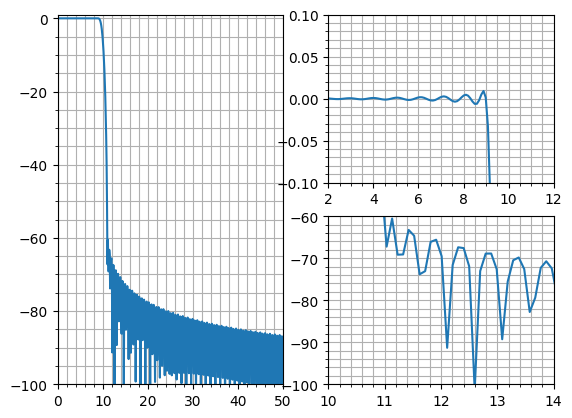

In [2]:
stop_band_attenuation = 60
f_sampling = 200
f_transition = 2
f_minus_6db = 10

beta = signal.kaiser_beta(stop_band_attenuation) # 1. calculate the kaiser beta
filter_length = math.ceil((f_sampling/f_transition) * (stop_band_attenuation-8)/14) # 2. estimate the filter length : N ~= f_sampling/ f_transition * (Attenuation (in dB) - 8) / 14
print('beta is', beta)
print('filter length is', filter_length)

filter_tap = signal.windows.kaiser(filter_length, beta=beta)
h = np.sinc(2*f_minus_6db/f_sampling*np.linspace(-(filter_length - 1)/2,(filter_length - 1)/2,filter_length))*filter_tap
h = h/sum(h)

h_from_method_1 = h

freq_response = np.fft.fft(h, 2048)
freq = np.arange(0, len(freq_response), 1)/len(freq_response) * f_sampling

plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 50)
ax.set_ylim(-100, 1)

ax = plt.subplot(2,2,2)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 2, 12
y_min, y_max = -0.1, 0.1

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


ax = plt.subplot(2,2,4)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 10, 14
y_min, y_max = -100, -60

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)



#### Method2:

(-100.0, -60.0)

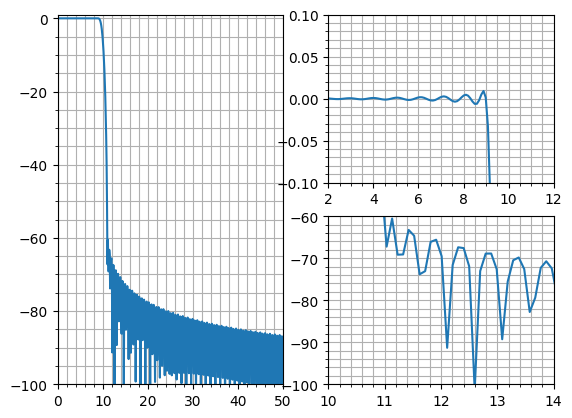

In [3]:
h = signal.firwin(filter_length, f_minus_6db, window=('kaiser', beta), fs=f_sampling)
w, freq_response = signal.freqz(h, worN=1024)

h_from_method_2 = h

plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(w/np.pi*100, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 50)
ax.set_ylim(-100, 1)

ax = plt.subplot(2,2,2)
plt.plot(w/2/(np.pi)*200, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 2, 12
y_min, y_max = -0.1, 0.1

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


ax = plt.subplot(2,2,4)
plt.plot(w/2/(np.pi)*200, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 10, 14
y_min, y_max = -100, -60

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


#### Verification that method 1 is equal to method 2

In [4]:
h_from_method_1 - h_from_method_2

array([-6.77626358e-21,  0.00000000e+00, -6.77626358e-21, -6.77626358e-21,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.38813179e-21,
        6.77626358e-21,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.35525272e-20,  0.00000000e+00,  0.00000000e+00, -3.38813179e-21,
        3.38813179e-21,  0.00000000e+00,  0.00000000e+00,  1.35525272e-20,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.38813179e-21,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.71050543e-20,
       -2.71050543e-20,  0.00000000e+00,  1.35525272e-20,  6.77626358e-21,
        6.77626358e-21,  0.00000000e+00,  2.71050543e-20,  5.42101086e-20,
        0.00000000e+00,  5.42101086e-20, -5.42101086e-20,  5.42101086e-20,
        0.00000000e+00,  0.00000000e+00, -1.35525272e-20, -5.42101086e-20,
        0.00000000e+00, -5.42101086e-20,  0.00000000e+00, -1.08420217e-19,
        5.42101086e-20,  